In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
metadata_path = '../Data/Dataset_Medellin/merge_cases_temp_precip_medellin_2019.csv'
rgb_images_path = '../Data/dataset_rbg/'
band7_images_path = '../Data/data_7_bands/'

## Metadata

In [3]:
# Read Data
merge_cases_temp_precip = pd.read_csv(metadata_path)
# Remove extra column
merge_cases_temp_precip.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
merge_cases_temp_precip.rename(columns={'temperature':'temperature_medellin'}, inplace=True)
merge_cases_temp_precip.rename(columns={'Medellin':'percipitation_medellin'}, inplace=True)
merge_cases_temp_precip.LastDayWeek = pd.to_datetime(merge_cases_temp_precip.LastDayWeek)
merge_cases_temp_precip

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek,MONTH,temperature_medellin,percipitation_medellin,percipitation_medellin_rural,percipitation_medellin_urbano
0,1,"['2007', 'w01']",2007,200701,2007-01-06,1,19.615357,10.400423,11.932660,9.624380
1,0,"['2007', 'w02']",2007,200702,2007-01-13,1,22.234000,19.510615,20.182476,19.153142
2,0,"['2007', 'w03']",2007,200703,2007-01-20,1,22.268857,2.036514,0.825607,2.551441
3,0,"['2007', 'w04']",2007,200704,2007-01-27,1,23.546000,19.405491,21.616968,18.439284
4,0,"['2007', 'w05']",2007,200705,2007-02-03,2,25.353071,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
671,15,"['2019', 'w48']",2019,201948,2019-11-30,11,21.430286,15.607313,15.862694,15.462729
672,20,"['2019', 'w49']",2019,201949,2019-12-07,12,23.005214,9.035788,6.591552,10.151920
673,30,"['2019', 'w50']",2019,201950,2019-12-14,12,23.116214,26.450263,26.978917,26.226603
674,14,"['2019', 'w51']",2019,201951,2019-12-21,12,21.851143,13.327096,14.847955,12.606804


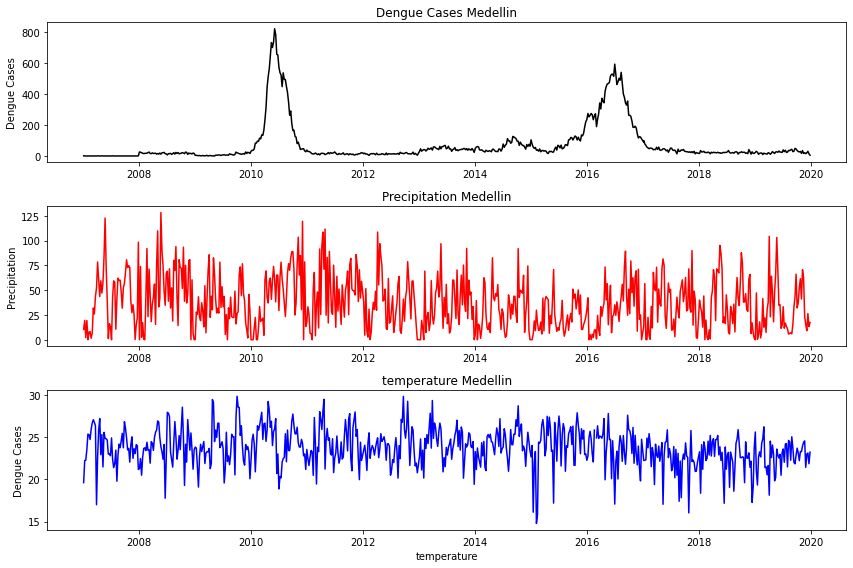

In [4]:
f, axarr = plt.subplots(3, 1, figsize=(12, 8))


axarr[0].plot(merge_cases_temp_precip['LastDayWeek'], merge_cases_temp_precip['cases_medellin'], color ='black')
axarr[0].set_title('Dengue Cases Medellin')
axarr[0].set_ylabel('Dengue Cases')
plt.tight_layout()

axarr[1].plot(merge_cases_temp_precip['LastDayWeek'], merge_cases_temp_precip['percipitation_medellin'], color ='red')
axarr[1].set_title('Precipitation Medellin')
axarr[1].set_ylabel('Precipitation')
plt.tight_layout()

axarr[2].plot(merge_cases_temp_precip['LastDayWeek'], merge_cases_temp_precip['temperature_medellin'], color ='blue')
axarr[2].set_title('temperature Medellin')
axarr[2].set_xlabel('temperature') 
axarr[2].set_ylabel('Dengue Cases')
plt.tight_layout()


plt.show()

## Satellie Images RGB

In [5]:
image_dates = []
for image_name in os.listdir(rgb_images_path):
    image_dates.append(image_name[image_name.index('_')+1:image_name.index('.')])
image_dates = pd.DataFrame(image_dates)
image_dates.rename(columns={0:'dates'}, inplace=True)
image_dates['dates'] = pd.to_datetime(image_dates['dates'])
image_dates.sort_values(by="dates")

,dates
15,2016-01-03
187,2016-01-10
218,2016-01-17
134,2016-01-24
219,2016-02-07
...,...
149,2021-08-07
33,2021-08-14
229,2021-08-21
131,2021-08-28


## 7 Band Images

In [6]:
image7_dates = []
for image_name in os.listdir(band7_images_path):
    image7_dates.append(image_name[image_name.index('_')+1:image_name.index('.')])
image7_dates = pd.DataFrame(image7_dates)
image7_dates.rename(columns={0:'dates'}, inplace=True)
image7_dates['dates'] = pd.to_datetime(image7_dates['dates'])
image7_dates.sort_values(by="dates")

,dates
15,2016-01-03
194,2016-01-10
226,2016-01-17
137,2016-01-24
155,2016-01-31
...,...
153,2021-08-07
33,2021-08-14
237,2021-08-21
134,2021-08-28


# Missing Values RGB

In [7]:
common = image7_dates.merge(image_dates, on=['dates'])

image7_dates[~image7_dates.dates.isin(common.dates)]

,dates
60,2016-02-28
68,2016-03-13
92,2016-04-10
144,2016-10-30
154,2016-02-21
155,2016-01-31
176,2016-05-29
203,2017-01-15
246,2017-01-08
271,2016-03-27


## Create dataset

In [8]:
image7_dates['image_name'] = image7_dates.dates.apply(lambda x: 'image_' + str(x)[:10] + '.tiff')
image7_dates.rename(columns={'dates': 'LastDayWeek'},inplace=True)
image7_dates

,LastDayWeek,image_name
0,2016-10-02,image_2016-10-02.tiff
1,2019-06-01,image_2019-06-01.tiff
2,2019-05-11,image_2019-05-11.tiff
3,2017-05-28,image_2017-05-28.tiff
4,2019-01-05,image_2019-01-05.tiff
...,...,...
292,2019-04-13,image_2019-04-13.tiff
293,2018-12-29,image_2018-12-29.tiff
294,2017-05-07,image_2017-05-07.tiff
295,2017-09-24,image_2017-09-24.tiff


In [9]:
from datetime import timedelta

def sum_1(day):
    
    if str(day)[:4] in ['2016', '2017']:
        day = day + timedelta(days=6)
    return day

In [10]:
image7_dates = image7_dates.applymap(sum_1)
image7_dates

,LastDayWeek,image_name
0,2016-10-08,image_2016-10-02.tiff
1,2019-06-01,image_2019-06-01.tiff
2,2019-05-11,image_2019-05-11.tiff
3,2017-06-03,image_2017-05-28.tiff
4,2019-01-05,image_2019-01-05.tiff
...,...,...
292,2019-04-13,image_2019-04-13.tiff
293,2018-12-29,image_2018-12-29.tiff
294,2017-05-13,image_2017-05-07.tiff
295,2017-09-30,image_2017-09-24.tiff


In [11]:
columns = ['cases_medellin', 'YearWeek', 'LastDayWeek', 'percipitation_medellin', 'temperature_medellin']
merge_cases_temp_precip = merge_cases_temp_precip[columns].rename(columns={'percipitation_medellin_urbano': 'percipitation_medellin'})
merge_cases_temp_precip

,cases_medellin,YearWeek,LastDayWeek,percipitation_medellin,temperature_medellin
0,1,200701,2007-01-06,10.400423,19.615357
1,0,200702,2007-01-13,19.510615,22.234000
2,0,200703,2007-01-20,2.036514,22.268857
3,0,200704,2007-01-27,19.405491,23.546000
4,0,200705,2007-02-03,0.000000,25.353071
...,...,...,...,...,...
671,15,201948,2019-11-30,15.607313,21.430286
672,20,201949,2019-12-07,9.035788,23.005214
673,30,201950,2019-12-14,26.450263,23.116214
674,14,201951,2019-12-21,13.327096,21.851143


In [12]:
dataset = merge_cases_temp_precip.merge(image7_dates, on =['LastDayWeek'], how='inner')
dataset

,cases_medellin,YearWeek,LastDayWeek,percipitation_medellin,temperature_medellin,image_name
0,274,201602,2016-01-09,42.326694,22.744857,image_2016-01-03.tiff
1,252,201603,2016-01-16,0.000000,24.934929,image_2016-01-10.tiff
2,262,201604,2016-01-23,5.177298,25.693857,image_2016-01-17.tiff
3,274,201605,2016-01-30,0.000000,24.786357,image_2016-01-24.tiff
4,266,201606,2016-02-06,5.563928,23.042000,image_2016-01-31.tiff
...,...,...,...,...,...,...
202,15,201948,2019-11-30,15.607313,21.430286,image_2019-11-30.tiff
203,20,201949,2019-12-07,9.035788,23.005214,image_2019-12-07.tiff
204,30,201950,2019-12-14,26.450263,23.116214,image_2019-12-14.tiff
205,14,201951,2019-12-21,13.327096,21.851143,image_2019-12-21.tiff


## Download

In [13]:
dataset.to_csv('../Data/Dataset_Medellin/medellin_data_2016-2019')

In [14]:
merge_cases_temp_precip.LastDayWeek[merge_cases_temp_precip.LastDayWeek <= '2016-01-5']

0     2007-01-06
1     2007-01-13
2     2007-01-20
3     2007-01-27
4     2007-02-03
         ...    
464   2015-12-05
465   2015-12-12
466   2015-12-19
467   2015-12-26
468   2016-01-02
Name: LastDayWeek, Length: 469, dtype: datetime64[ns]